<a href="https://colab.research.google.com/github/Ashail33/Masters-work/blob/master/Mini_batch_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.datasets import make_blobs

# Generate some random data
X, y = make_blobs(n_samples=100000, centers=10, n_features=100, random_state=42)

# Create and fit the MiniBatchKMeans model
batch_size = 1000
n_clusters = 10
mbkmeans = MiniBatchKMeans(n_clusters=n_clusters, batch_size=batch_size, random_state=42)
mbkmeans.fit(X)

# Print the cluster centroids and inertia
print("MiniBatchKMeans cluster centroids:\n", mbkmeans.cluster_centers_)
print("MiniBatchKMeans inertia:", mbkmeans.inertia_)

# Compare with regular KMeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)
print("KMeans cluster centroids:\n", kmeans.cluster_centers_)
print("KMeans inertia:", kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


MiniBatchKMeans cluster centroids:
 [[ 3.96400232e+00  7.25543201e-01 -3.83729096e+00  6.28479274e+00
   3.69520653e+00 -6.76791965e+00  8.22413914e+00  6.46347486e+00
   8.99563039e+00  4.52909488e+00  2.28295288e+00 -1.63095113e+00
   8.65394590e+00  7.31874606e+00 -9.10141875e+00 -9.45588221e+00
  -2.47654275e+00  6.24298605e+00  9.76046052e+00 -6.99032184e+00
   1.89931293e+00 -2.38866459e+00  9.40598099e+00  6.83398220e+00
   6.79378779e+00 -6.14662748e-01 -1.68950061e+00 -4.53594257e+00
  -8.89818375e+00  7.29459606e+00  6.25192272e+00  9.98274299e+00
   9.91766558e+00  1.11149226e+00  5.38028319e+00  8.89465011e+00
   7.00331684e+00 -5.04679344e+00 -9.73193166e-01 -7.44759520e+00
   9.06579077e+00  2.13031811e+00 -5.42861544e+00  3.43147054e+00
   2.35311075e+00 -2.83035448e+00 -7.73749048e+00  3.42974376e+00
   4.04836153e-01  5.42563421e+00  3.89711154e-01  7.06614065e+00
   1.04341968e+00  1.22044929e+00  7.50253827e+00 -1.93981078e+00
  -7.30952296e+00 -9.41767492e+00  5.097

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans cluster centroids:
 [[ 0.66477295 -8.96730701 -3.25446764 -7.3172055  -8.73177375  9.78330249
  -3.55788391  6.18710735 -4.90072877  3.62183427  5.20488771  1.9091713
  -0.55778555 -1.76616458 -3.00707257  8.59754068  6.62200582  9.29950099
  -7.50130173  4.61116452  8.77479181 -6.37419806 -8.66282462  4.83908416
   1.50298866  6.84660942 -7.21008643  5.90923414 -5.97591818 -6.73573188
  -6.73299051  6.29671492  3.29924344  0.47027813 -2.82813535  7.54194978
  -2.14298947  6.31959356 -1.24434774 -2.47083123 -0.76282519 -3.9731088
   4.96324858  0.05439013 -5.37604696  7.98911508 -2.30598311  0.88402022
   8.14053186  2.46360243 -7.68878065  8.79361938  2.54757031 -3.31089453
  -7.21066837  5.89349624  2.39825485  0.65429095  7.87780396  5.77109531
  -6.97135122 -3.7561317  -5.03888497  4.88264148 -9.33049054  1.39497203
   5.24164373  7.53247246 -3.14119964  6.422776   -7.77619322  6.92876595
  -7.46499295 -2.05591802  5.97340052 -7.03500094 -5.41642659  4.46365383
   4.39095169

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification

# Generate three different datasets
X_moons, y_moons = make_moons(n_samples=100000, noise=0.05)
X_circles, y_circles = make_circles(n_samples=100000, noise=0.05, factor=0.5)
X_classification, y_classification = make_classification(n_samples=100000, n_features=20, n_informative=10, n_redundant=5, n_clusters_per_class=2, random_state=42)

# Evaluate MiniBatchKMeans on all three datasets
for X, name in [(X_moons, 'moons'), (X_circles, 'circles'), (X_classification, 'classification')]:
    print(f"Dataset: {name}")
    mbkmeans = MiniBatchKMeans(n_clusters=2, batch_size=1000, random_state=42)
    kmeans = KMeans(n_clusters=2, random_state=42)

    # Time the execution of MiniBatchKMeans
    %timeit -r 3 -n 3 mbkmeans.fit(X)

    # Time the execution of KMeans
    %timeit -r 3 -n 3 kmeans.fit(X)

    # Print the inertia for both models
    print("MiniBatchKMeans inertia:", mbkmeans.inertia_)
    print("KMeans inertia:", kmeans.inertia_)


Dataset: moons


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: 

The slowest run took 11.45 times longer than the fastest. This could mean that an intermediate result is being cached.
299 ms ± 324 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

747 ms ± 60.6 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)
MiniBatchKMeans inertia: 40222.97731323751
KMeans inertia: 40207.04862924406
Dataset: circles


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: 

25.4 ms ± 6.1 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

777 ms ± 85.3 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)
MiniBatchKMeans inertia: 40104.010743741965
KMeans inertia: 40077.11208163622
Dataset: classification


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: 

176 ms ± 23.4 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

1.77 s ± 193 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)
MiniBatchKMeans inertia: 10440534.214954082
KMeans inertia: 9259083.996400138


In [4]:
import re

# Evaluate MiniBatchKMeans on all three datasets
inertia_mbkmeans = []
time_mbkmeans = []
for X, name in [(X_moons, 'moons'), (X_circles, 'circles'), (X_classification, 'classification')]:
    mbkmeans = MiniBatchKMeans(n_clusters=2, batch_size=1000, random_state=42)

    # Time the execution of MiniBatchKMeans
    result = %timeit -r 3 -n 3 -o mbkmeans.fit(X)

    # Record the time and inertia for MiniBatchKMeans
    time_mbkmeans.append(result.best)
    inertia_mbkmeans.append(mbkmeans.inertia_)

# Evaluate KMeans on all three datasets
inertia_kmeans = []
time_kmeans = []
for X, name in [(X_moons, 'moons'), (X_circles, 'circles'), (X_classification, 'classification')]:
    kmeans = KMeans(n_clusters=2, random_state=42)

    # Time the execution of KMeans
    result = %timeit -r 3 -n 3 -o kmeans.fit(X)

    # Record the time and inertia for KMeans
    time_kmeans.append(result.best)
    inertia_kmeans.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: 

The slowest run took 9.91 times longer than the fastest. This could mean that an intermediate result is being cached.
188 ms ± 198 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: 

23.1 ms ± 4.99 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: 

341 ms ± 197 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

833 ms ± 72.4 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

851 ms ± 96.4 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

1.82 s ± 260 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: 

The slowest run took 8.41 times longer than the fastest. This could mean that an intermediate result is being cached.
300 ms ± 302 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)
15.2 ms ± 218 µs per loop (mean ± std. dev. of 3 runs, 3 loops each)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: 

127 ms ± 39.7 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

810 ms ± 27.7 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

812 ms ± 123 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

1.77 s ± 171 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)


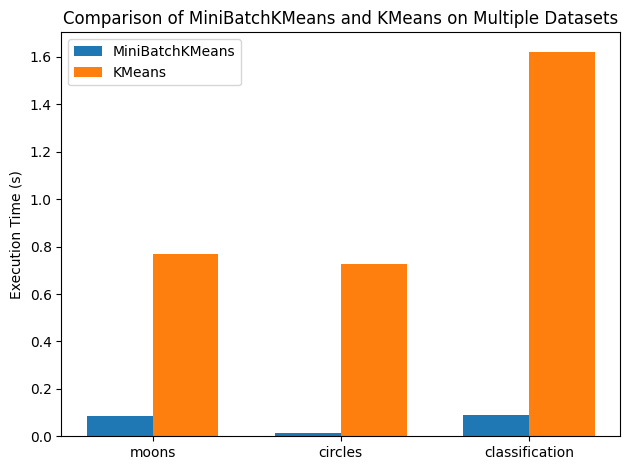

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Generate three different datasets
X_moons, y_moons = make_moons(n_samples=100000, noise=0.05)
X_circles, y_circles = make_circles(n_samples=100000, noise=0.05, factor=0.5)
X_classification, y_classification = make_classification(n_samples=100000, n_features=20, n_informative=10, n_redundant=5, n_clusters_per_class=2, random_state=42)

# Evaluate MiniBatchKMeans on all three datasets
inertia_mbkmeans = []
time_mbkmeans = []
for X, name in [(X_moons, 'moons'), (X_circles, 'circles'), (X_classification, 'classification')]:
    mbkmeans = MiniBatchKMeans(n_clusters=2, batch_size=1000, random_state=42)

    # Time the execution of MiniBatchKMeans
    result = %timeit -r 3 -n 3 -o mbkmeans.fit(X)

    # Record the time and inertia for MiniBatchKMeans
    time_mbkmeans.append(result.best)
    inertia_mbkmeans.append(mbkmeans.inertia_)

# Evaluate KMeans on all three datasets
inertia_kmeans = []
time_kmeans = []
for X, name in [(X_moons, 'moons'), (X_circles, 'circles'), (X_classification, 'classification')]:
    kmeans = KMeans(n_clusters=2, random_state=42)

    # Time the execution of KMeans
    result = %timeit -r 3 -n 3 -o kmeans.fit(X)

    # Record the time and inertia for KMeans
    time_kmeans.append(result.best)
    inertia_kmeans.append(kmeans.inertia_)

# Plot the results in a bar chart
datasets = ['moons', 'circles', 'classification']
x = np.arange(len(datasets))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, time_mbkmeans, width, label='MiniBatchKMeans')
rects2 = ax.bar(x + width/2, time_kmeans, width, label='KMeans')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Execution Time (s)')
ax.set_title('Comparison of MiniBatchKMeans and KMeans on Multiple Datasets')
ax.set_xticks(x)
ax.set_xticklabels(datasets)
ax.legend()

fig.tight_layout()
plt.show()
